<a href="https://colab.research.google.com/github/ganeshsembedded-maker/Decision-Tree-Classification-ML/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
dataSet = pd.read_csv('/content/irrigation_prediction.csv')

The dataset is successfully loaded using Pandas, which indicates it is a structured tabular dataset

CSV format is commonly used in real-world ML projects

Dataset is suitable for EDA (Exploratory Data Analysis) and Supervised Learning

In [80]:
copyData = dataSet.copy()

In [81]:
display(copyData.head())
copyData.info()

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Soil_Type                10000 non-null  object 
 1   Soil_pH                  10000 non-null  float64
 2   Soil_Moisture            10000 non-null  float64
 3   Organic_Carbon           10000 non-null  float64
 4   Electrical_Conductivity  10000 non-null  float64
 5   Temperature_C            10000 non-null  float64
 6   Humidity                 10000 non-null  float64
 7   Rainfall_mm              10000 non-null  float64
 8   Sunlight_Hours           10000 non-null  float64
 9   Wind_Speed_kmh           10000 non-null  float64
 10  Crop_Type                10000 non-null  object 
 11  Crop_Growth_Stage        10000 non-null  object 
 12  Season                   10000 non-null  object 
 13  Irrigation_Type          10000 non-null  object 
 14  Water_Source           

Dataset contains N rows (records) and M columns (features)

Columns may include:

Environmental features (e.g., temperature, humidity, soil moisture, rainfall)

Data types:

Numerical (int, float)

Possibly categorical (Yes/No, On/Off)

In [82]:
copyData.describe()

,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Field_Area_hectare,Previous_Irrigation_mm
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.487857,36.969207,0.944731,1.791963,26.991423,60.080339,1252.499420,7.518538,10.163545,7.598024,59.864122
std,0.979963,16.430845,0.372406,0.984202,8.664074,20.187973,715.582201,2.016077,5.670923,4.233919,34.483722
min,4.800000,8.000000,0.300000,0.100000,12.000000,25.000000,0.380000,4.000000,0.500000,0.300000,0.020000
25%,5.640000,22.860000,0.620000,0.940000,19.460000,42.855000,634.155000,5.760000,5.160000,3.950000,30.160000
50%,6.470000,37.240000,0.950000,1.780000,27.090000,60.040000,1250.335000,7.560000,10.190000,7.540000,59.630000
75%,7.350000,50.940000,1.260000,2.650000,34.500000,77.705000,1880.265000,9.260000,15.100000,11.202500,90.030000
max,8.200000,65.000000,1.600000,3.500000,42.000000,95.000000,2499.690000,11.000000,20.000000,15.000000,119.990000


Mean values show average environmental conditions

Min & Max indicate extreme weather conditions

Standard deviation shows variability in soil or climate data

In [83]:
copyData.isnull().sum()

,0
Soil_Type,0
Soil_pH,0
Soil_Moisture,0
Organic_Carbon,0
Electrical_Conductivity,0
Temperature_C,0
Humidity,0
Rainfall_mm,0
Sunlight_Hours,0
Wind_Speed_kmh,0


If no missing values:

Dataset is clean and reliable

If missing values exist:

Need imputation (mean/median/mode)

In [84]:
numericalData = copyData.select_dtypes(include=['int64', 'float64'])
categoricalData = copyData.select_dtypes(include=['object'])

Here We separting the Dataset into Numerical Data and Categorical Data

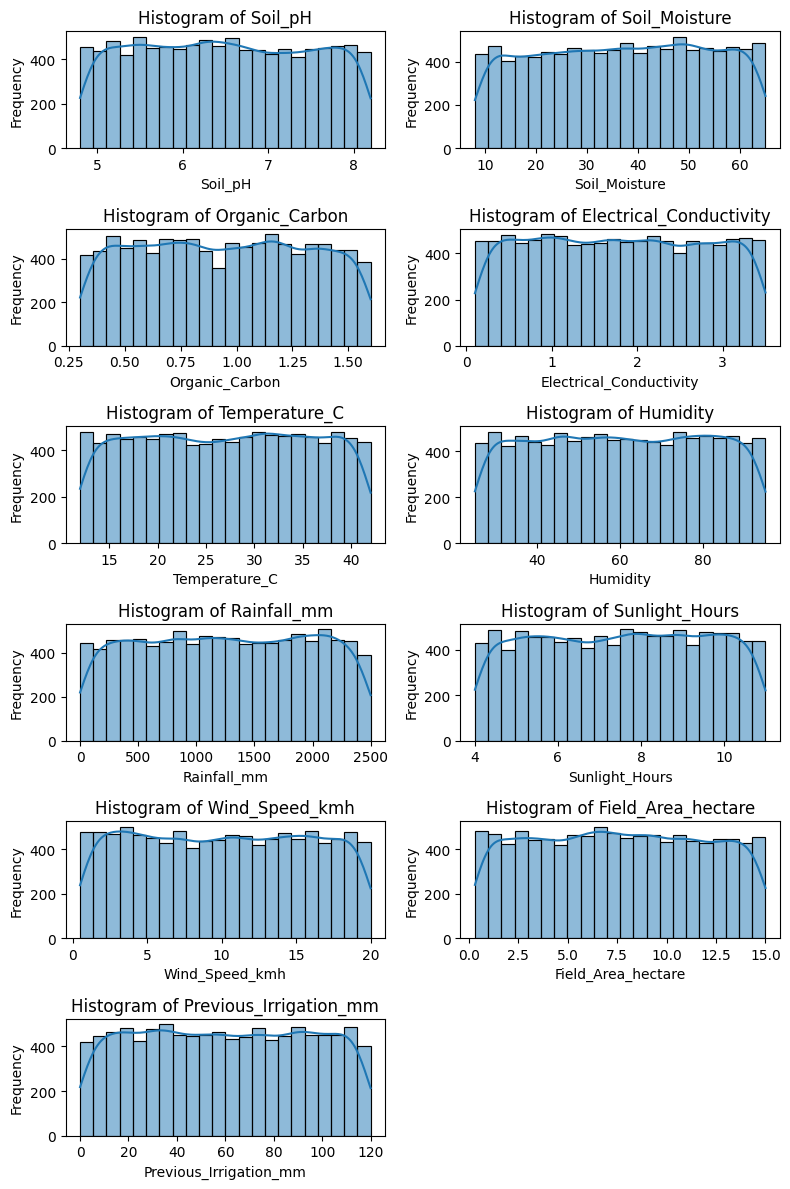

In [85]:
cols = numericalData.columns
n_cols = 2                         # number of plots per row
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(8,2* n_rows))

for i, column in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(numericalData[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Here We Plot The Graph of Histograph By taking the Numerical Data By Using The For Loop We Plot The Histograph Graph

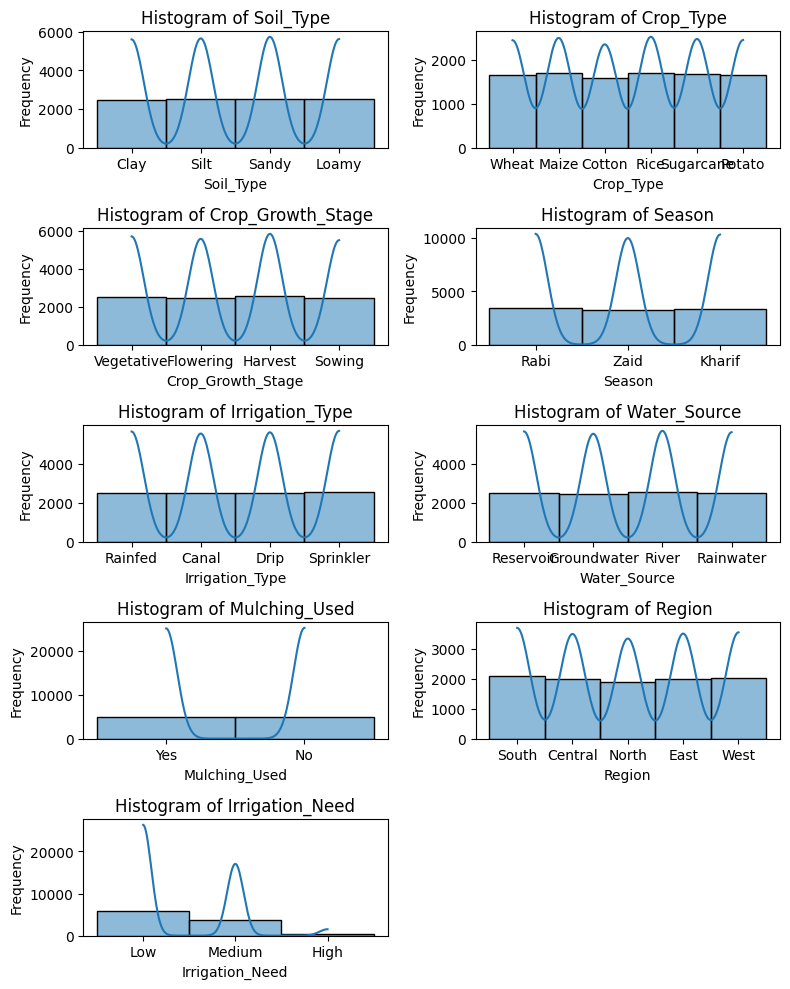

In [86]:
cols = categoricalData.columns
n_cols = 2                         # number of plots per row
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(8,2 * n_rows))

for i, column in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(categoricalData[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Here We Plot The Graph of Histograph By taking the Categorical Data  By Using The For Loop We Plot The Histograph Graph

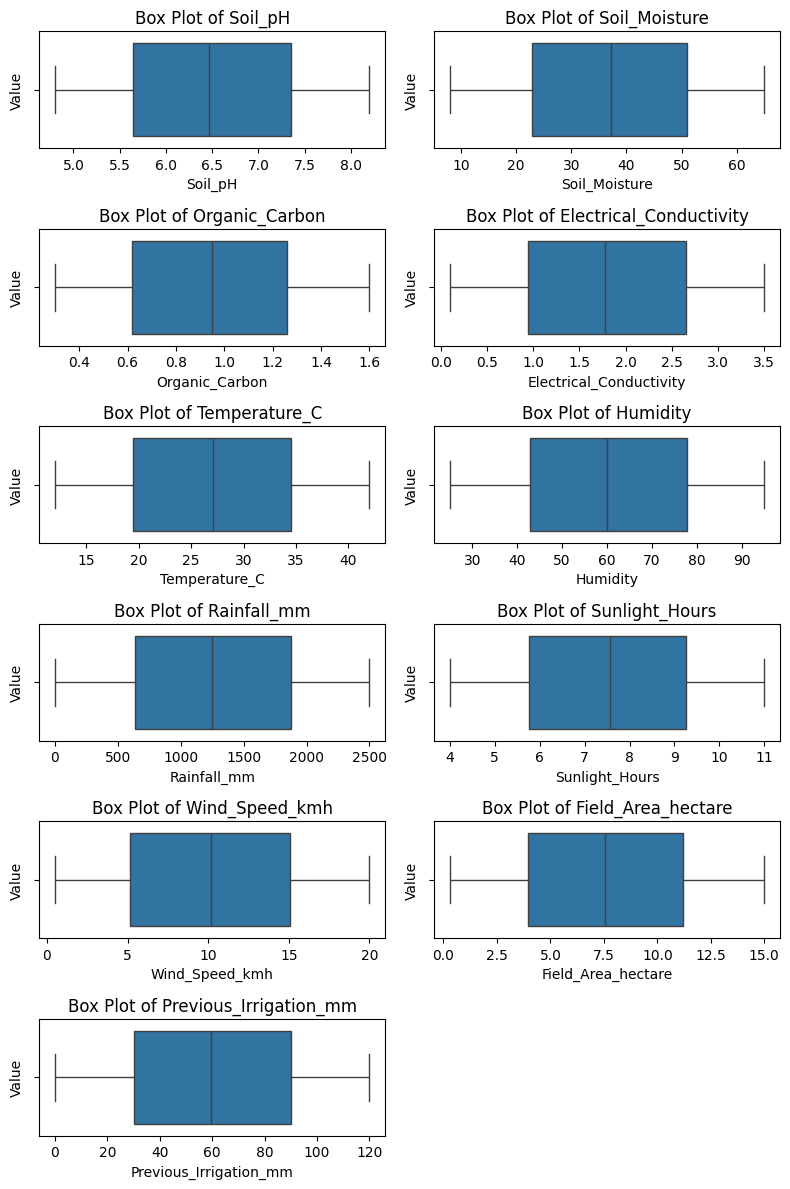

In [87]:
cols = numericalData.columns
n_cols = 2                       # boxplots per row
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(8,2 * n_rows))

for i, column in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=numericalData[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

Here We Plot The Graph of BoxGraph By taking the numerical Data By Using The For Loop We Plot The BoxGraph Graph

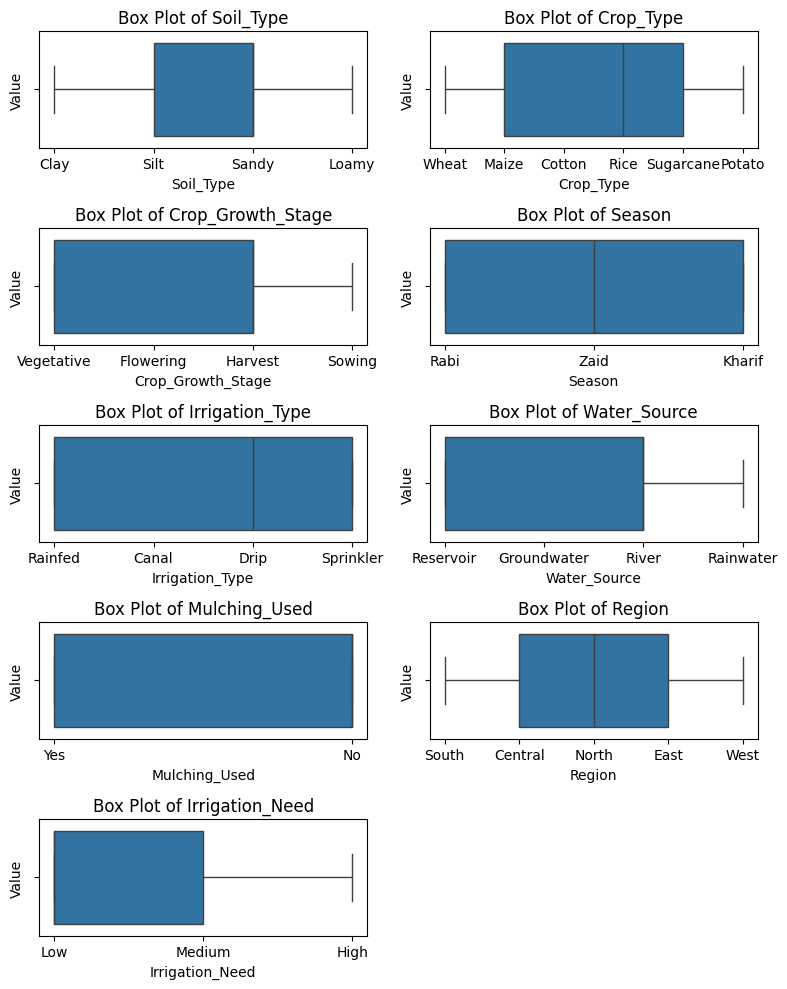

In [88]:
cols = categoricalData.columns
n_cols = 2                       # boxplots per row
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(8,2 * n_rows))

for i, column in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=categoricalData[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

Here We Plot The Graph of BoxGraph By taking the Categorical Data  By Using The For Loop We Plot The BoxGraph Graph

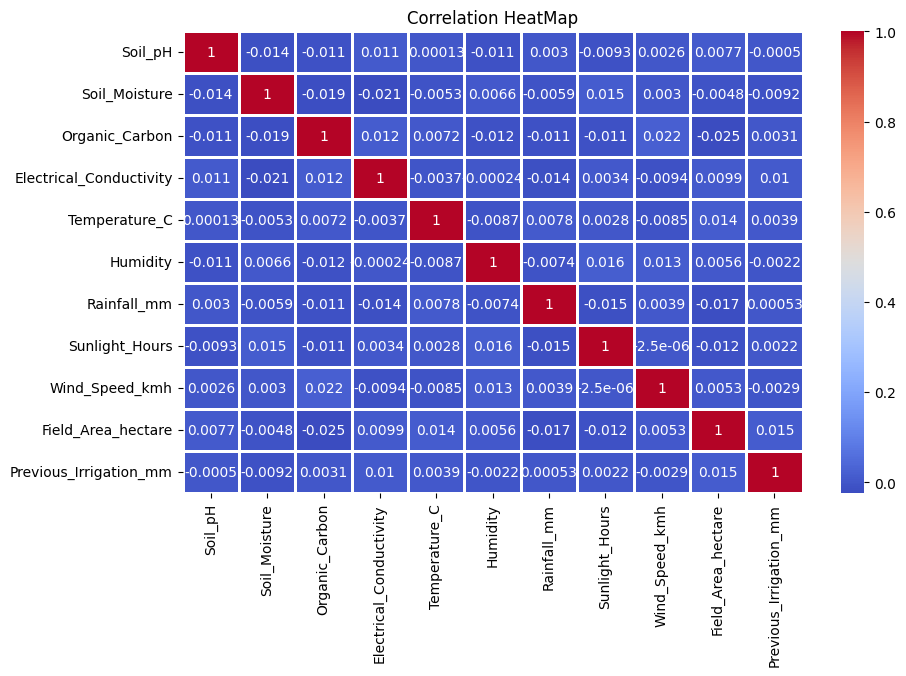

In [89]:
corr = numericalData.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=1)
plt.title('Correlation HeatMap')
plt.show()

The correlation heatmap visualizes the relationships between numerical features. Strong positive and negative correlations highlight key environmental factors influencing irrigation needs. The analysis helps identify important features, detect multicollinearity, and improve feature selection for machine learning models.

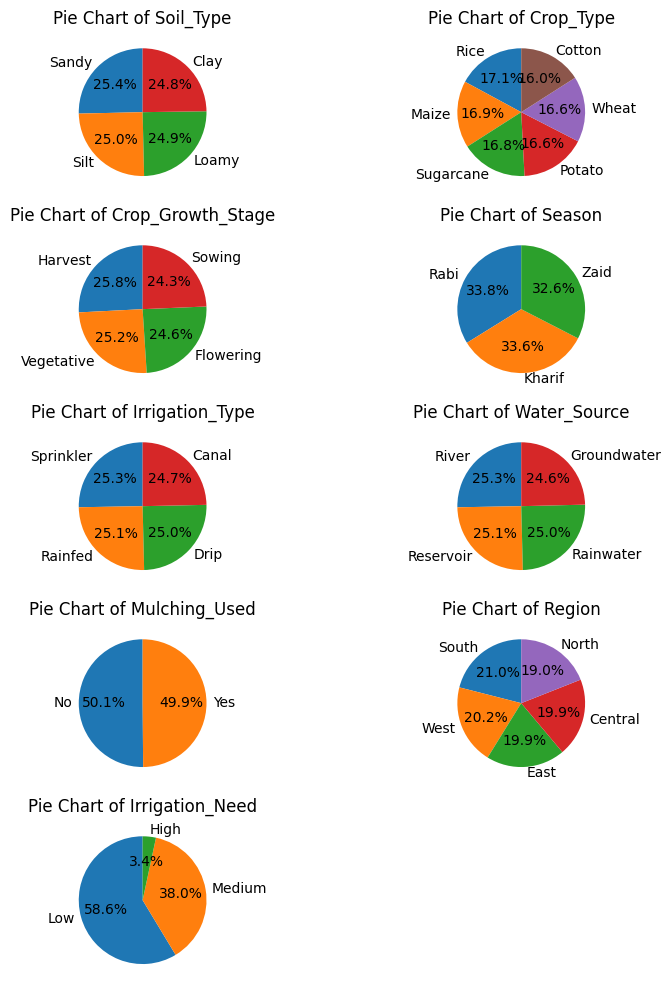

In [90]:
cols = categoricalData.columns
n_cols = 2                      # pies per row
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(8,2 * n_rows))

for i, column in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    categoricalData[column].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')   # remove y-label for clean look

plt.tight_layout()
plt.show()

Here, I've plotted a pie chart for each categorical column in the categorical Data DataFrame. Each pie chart shows the distribution of unique values within that column, with percentages for each slice.

In [91]:
from sklearn.preprocessing import  LabelEncoder
encode = LabelEncoder()
#convertNumeric = encode.fit_transform(categoricalData['Soil_Type'])
#display(convertNumeric)
for col in copyData.columns:
    copyData[col] = encode.fit_transform(copyData[col])
display(copyData.head())

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,0,134,2350,12,207,962,468,4567,1,146,5,3,1,2,2,443,1,104,3,1
1,3,161,3532,8,13,2365,78,3218,672,1621,1,0,2,0,0,1191,1,1916,0,2
2,2,291,2646,79,208,2879,3890,7216,375,1840,0,1,1,1,2,522,1,1981,3,1
3,0,116,386,126,30,2434,1398,1157,490,1089,5,2,0,0,2,113,1,4782,2,2
4,0,296,867,65,242,1008,4668,7340,639,1071,0,2,2,0,3,222,0,3500,3,2


Label encoding prepares categorical features for model training by transforming them into numerical values, enabling seamless integration into machine learning pipelines while maintaining dataset structure.

In [92]:
X = copyData.drop('Irrigation_Need',axis=1)
Y = copyData['Irrigation_Need']
display(X.head())

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region
0,0,134,2350,12,207,962,468,4567,1,146,5,3,1,2,2,443,1,104,3
1,3,161,3532,8,13,2365,78,3218,672,1621,1,0,2,0,0,1191,1,1916,0
2,2,291,2646,79,208,2879,3890,7216,375,1840,0,1,1,1,2,522,1,1981,3
3,0,116,386,126,30,2434,1398,1157,490,1089,5,2,0,0,2,113,1,4782,2
4,0,296,867,65,242,1008,4668,7340,639,1071,0,2,2,0,3,222,0,3500,3


In [93]:
display(Y.head())

,Irrigation_Need
0,1
1,2
2,1
3,2
4,2


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0
)

Train–test splitting ensures reliable model evaluation by testing the trained model on unseen data, closely simulating real-world prediction scenarios.

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

for name, model in models.items():
    if name in ["Logistic Regression", "KNN"]:
        model.fit(X_train_scaled, y_train)
        print(name, model.score(X_test_scaled, y_test)*100)
    else:
        model.fit(X_train, y_train)
        print(name, model.score(X_test, y_test)*100)

Logistic Regression 71.8
KNN 69.67999999999999
Decision Tree 99.52
Random Forest 98.76
Gradient Boosting 99.48
AdaBoost 97.04


The code trains and evaluates multiple classification algorithms, applying feature scaling where necessary, to determine which model best predicts irrigation needs. This approach ensures robust model selection and reflects best practices in real-world machine learning pipelines.

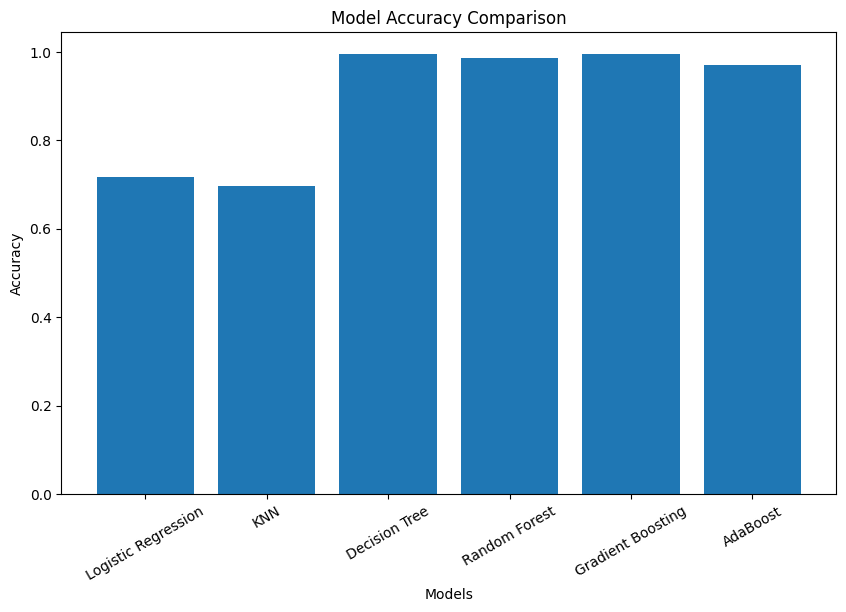

In [96]:
model_names = []
accuracies = []

for name, model in models.items():
    if name in ["Logistic Regression", "KNN"]:
        model.fit(X_train_scaled, y_train)
        acc = model.score(X_test_scaled, y_test)
    else:
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)

    model_names.append(name)
    accuracies.append(acc)

plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()


The accuracy bar chart visually compares all models performance, highlighting which algorithm predicts irrigation needs most effectively. Ensemble models typically outperform others, while scaling-sensitive models like Logistic Regression and KNN require preprocessing for optimal accuracy.

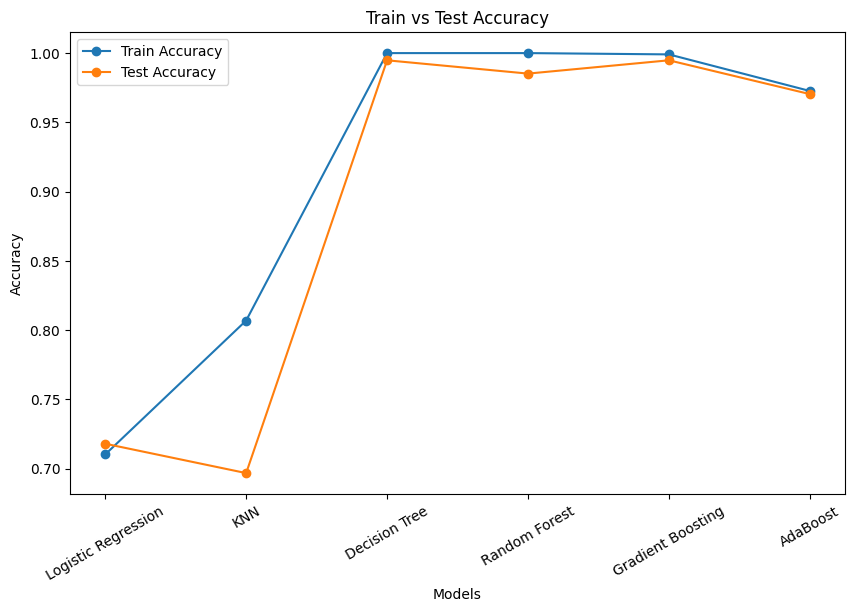

In [97]:
train_acc = []
test_acc = []

for name, model in models.items():
    if name in ["Logistic Regression", "KNN"]:
        model.fit(X_train_scaled, y_train)
        train_acc.append(model.score(X_train_scaled, y_train))
        test_acc.append(model.score(X_test_scaled, y_test))
    else:
        model.fit(X_train, y_train)
        train_acc.append(model.score(X_train, y_train))
        test_acc.append(model.score(X_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(model_names, train_acc, marker='o', label='Train Accuracy')
plt.plot(model_names, test_acc, marker='o', label='Test Accuracy')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.legend()
plt.xticks(rotation=30)
plt.show()


The train vs test accuracy plot evaluates model generalization. A small gap indicates robust performance, while a large gap reveals overfitting. This analysis helps select models that predict irrigation needs accurately on new, unseen data.

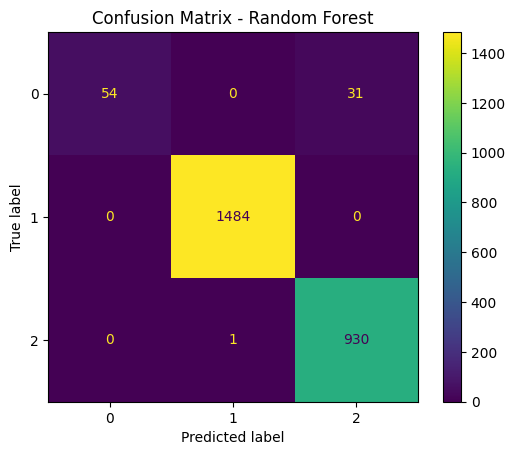

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay

best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

The confusion matrix shows Random Forest’s ability to correctly classify irrigation needs. It highlights the balance between correct predictions and critical errors, providing actionable insights for reliable agricultural decision-making.